# This is a the Test Simulation for MWM 100pc Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
bright_tab = Table.read('workspace/target_files/100pc/mwm_100pc_bright_2x1.csv')
dim_tab = Table.read('workspace/target_files/100pc/mwm_100pc_faint_1x1.csv')
bright_tab

ra,dec
float64,float64
201.901416737,12.9794737955
84.5962160455,18.4098205196
256.805132086,3.75535100549
285.890592933,-4.41381949604
259.900413094,-34.759827357
139.409739671,-19.1874662589
241.243650318,8.77166827986
289.969114762,-14.2286793327
165.370316238,-37.7408915943


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


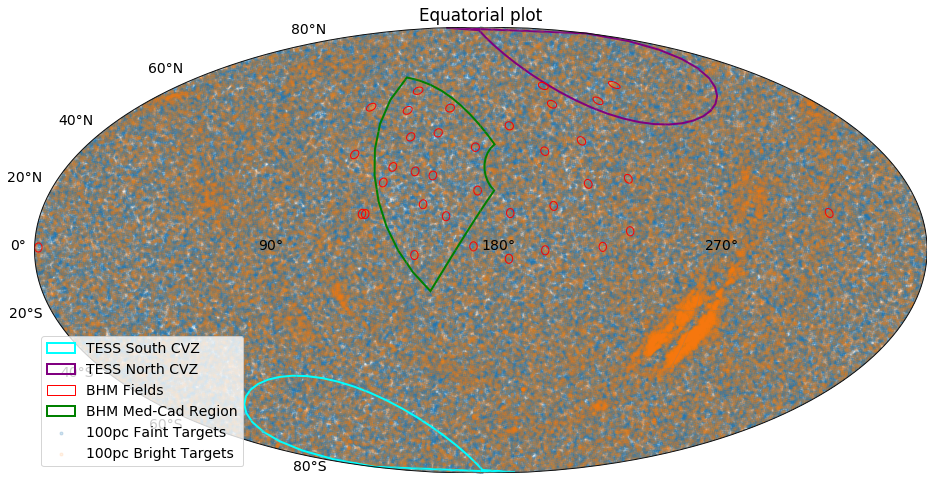

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
xdim,ydim = bmap(dim_tab['ra'],dim_tab['dec'])
bmap.scatter(xdim,ydim,marker='.',label='100pc Faint Targets',alpha=0.2)
xbright,ybright = bmap(bright_tab['ra'],bright_tab['dec'])
bmap.scatter(xbright,ybright,marker='.',label='100pc Bright Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

## Combine target tables together

In [5]:
num_targets = len(bright_tab)+len(dim_tab)
target_tab['ra'] = np.concatenate([dim_tab['ra'],bright_tab['ra']])
target_tab['dec'] = np.concatenate([dim_tab['dec'],bright_tab['dec']])
cadence_arr = np.concatenate([np.repeat('mwm_100pc_faint_1x1',len(dim_tab)),
                              np.repeat('mwm_100pc_bright_2x1',len(bright_tab))])
target_tab['cadence'] = cadence_arr
target_tab['type'] = np.repeat('mwm_100pc',num_targets)
target_tab['priority'] = np.repeat(np.array(35,dtype='int32'),num_targets)
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),num_targets)

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str20,str9,int32,float32
356.345848184,-8.28250935862,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
143.062057818,52.9088526695,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
340.497601028,41.0719197315,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
142.477457554,-81.0711983559,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
245.51746767,-4.67879088518,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
1.73404176386,23.4704437715,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
143.716572398,-17.2661560288,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
275.200660393,-19.5579552537,mwm_100pc_faint_1x1,mwm_100pc,35,1.0
115.555574563,31.9508111562,mwm_100pc_faint_1x1,mwm_100pc,35,1.0


In [7]:
target_tab.write('mwm_100pc_target.fits',overwrite=True)

## Create Cadence Table

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = np.array(['mwm_100pc_faint_1x1','mwm_100pc_bright_2x1'])
cadence_tab['nepochs'] = np.array([1,2],dtype='int32')
cadence_tab['delta'] = np.array([[0,np.nan],[0,180]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0,np.nan],[0,1]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0,np.nan],[0,360]],dtype='float32')
cadence_tab['lunation'] = np.array([[0.35,np.nan],[0.35,1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['boss',np.nan],['boss','apogee']])

In [10]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str20,int32,float32,float32,float32,float32,str6
mwm_100pc_faint_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.35 .. nan,boss .. nan
mwm_100pc_bright_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 360.0,0.35 .. 1.0,boss .. apogee


In [11]:
cadence_tab.write('mwm_100pc_cadence.fits',overwrite=True)

In [12]:
test =  Table.read('mwm_100pc_cadence.fits')
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes20,int32,float32,float32,float32,float32,bytes24
mwm_100pc_faint_1x1,1,0.0 .. nan,0.0 .. nan,0.0 .. nan,0.35 .. nan,boss .. nan
mwm_100pc_bright_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 360.0,0.35 .. 1.0,boss .. apogee
